# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Reading-in-images" data-toc-modified-id="Reading-in-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading in images</a></div><div class="lev2 toc-item"><a href="#Images-are-actually-arrays-of-numbers" data-toc-modified-id="Images-are-actually-arrays-of-numbers-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Images are actually arrays of numbers</a></div><div class="lev2 toc-item"><a href="#Conveying-colors:-each-color-channel-is-a-2D-array" data-toc-modified-id="Conveying-colors:-each-color-channel-is-a-2D-array-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conveying colors: each color channel is a 2D array</a></div><div class="lev2 toc-item"><a href="#Appropriate-data-types-for-image-arrays" data-toc-modified-id="Appropriate-data-types-for-image-arrays-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Appropriate data types for image arrays</a></div><div class="lev1 toc-item"><a href="#Image-analysis-and-manipulation" data-toc-modified-id="Image-analysis-and-manipulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image analysis and manipulation</a></div><div class="lev2 toc-item"><a href="#gamma-correction:-changing-contrast" data-toc-modified-id="gamma-correction:-changing-contrast-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>gamma correction: changing contrast</a></div><div class="lev2 toc-item"><a href="#reading-raw-files." data-toc-modified-id="reading-raw-files.-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>reading raw files.</a></div><div class="lev1 toc-item"><a href="#Extracting-areas-from-an-image" data-toc-modified-id="Extracting-areas-from-an-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extracting areas from an image</a></div><div class="lev2 toc-item"><a href="#selecting-based-on-flux" data-toc-modified-id="selecting-based-on-flux-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>selecting based on flux</a></div><div class="lev2 toc-item"><a href="#extracting-connnected-regions" data-toc-modified-id="extracting-connnected-regions-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>extracting connnected regions</a></div><div class="lev2 toc-item"><a href="#selecting-by-color" data-toc-modified-id="selecting-by-color-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>selecting by color</a></div><div class="lev2 toc-item"><a href="#Finding-edges" data-toc-modified-id="Finding-edges-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Finding edges</a></div><div class="lev3 toc-item"><a href="#Sobel-filter" data-toc-modified-id="Sobel-filter-341"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Sobel filter</a></div><div class="lev3 toc-item"><a href="#Canny-filter" data-toc-modified-id="Canny-filter-342"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Canny filter</a></div>

In [1]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.ndimage as nd

# Reading in images

## Images are actually arrays of numbers

each pixel in the image has a value associated to it. Typical encoding is 8bit - unsigned integer. range is 0-255 where 0 is darkest (black), 255 is brightest (white) if it is an 8-bit image.

In [4]:
nd.imread("esb.jpg")

array([[[ 47,  77, 103],
        [ 46,  76, 102],
        [ 44,  74, 100],
        ..., 
        [ 51, 104, 144],
        [ 52, 105, 145],
        [ 53, 106, 148]],

       [[ 41,  71,  97],
        [ 39,  69,  95],
        [ 37,  67,  93],
        ..., 
        [ 44,  97, 137],
        [ 45,  98, 138],
        [ 45,  98, 138]],

       [[ 40,  70,  96],
        [ 38,  68,  94],
        [ 37,  67,  93],
        ..., 
        [ 43,  96, 136],
        [ 44,  97, 137],
        [ 43,  96, 136]],

       ..., 
       [[ 39,  77,  88],
        [ 40,  76,  90],
        [ 41,  74,  89],
        ..., 
        [ 25,  53,  65],
        [ 25,  53,  65],
        [ 25,  53,  65]],

       [[ 41,  79,  90],
        [ 42,  78,  92],
        [ 42,  75,  90],
        ..., 
        [ 28,  54,  67],
        [ 27,  53,  66],
        [ 27,  53,  66]],

       [[ 45,  83,  94],
        [ 45,  81,  95],
        [ 46,  79,  94],
        ..., 
        [ 33,  59,  72],
        [ 32,  58,  71],
        [ 32,  58,

(652, 236, 3)


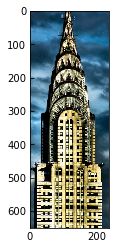

In [7]:
print (nd.imread("esb.jpg").shape)
imshow(nd.imread("esb.jpg"))

## Conveying colors: each color channel is a 2D array 
images are 2D, but image files are 3D arrays (typically) with 2D array for each color channel red green and blue (RGB). More layer can exist in different color coding schemes, and if an opacity layer exist (alpha channel, for example in png format)



In [19]:
imfile = "esb.jpg"
img = nd.imread(imfile)
print ("shape of image file:", img.shape)


shape of image file: (652, 236, 3)


the first axis is the rows (1008 rows in this image), the second axis the columns (672 columns) the third axis is the "channels", i.e. the color components. Here we have an RGB image: 

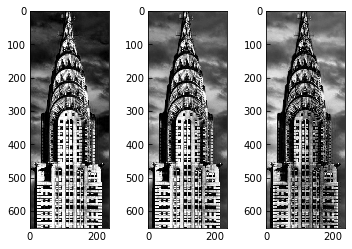

In [20]:
fig = pl.figure()
fig.add_subplot(131)
pl.imshow(img[:,:,0], cmap="gray")
fig.add_subplot(132)
pl.imshow(img[:,:,1], cmap="gray")
fig.add_subplot(133)
tmp = pl.imshow(img[:,:,2], cmap="gray")

In [21]:
print("mean by channel:", img.mean(0).mean(0))
print("max by channel:", img.max(0).max(0))
print("min by channel:", img.min(0).min(0))


mean by channel: [  92.53650437  109.17090829  104.89339841]
max by channel: [255 255 255]
min by channel: [0 0 0]


In [22]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure().add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

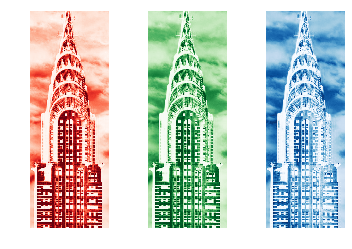

In [23]:
fig = pl.figure()
ax = fig.add_subplot(131)
showme(img[:,:,0], cmap="Reds", ax=ax)
ax = fig.add_subplot(132)
showme(img[:,:,1], cmap="Greens", ax=ax)
ax = fig.add_subplot(133)
showme(img[:,:,2], cmap="Blues", ax=ax)

matplotlibs know how to display a 3D array as an image, using the three channels for colors

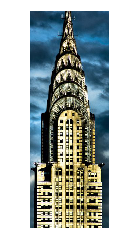

In [24]:
showme(img)

## Appropriate data types for image arrays

In [25]:
print(img.max(0).max(0))
print(img.min(0).min(0))

[255 255 255]
[0 0 0]


In [26]:
img.dtype

dtype('uint8')

If your image type is not uint8 (8-bit unsigned integer) matplotlib will not show it correctly.
Note that this is a display issue, not an inherent issue though! - your scientific images can contain float values and be more different than a 1/255th if your sensors allow that resolution.

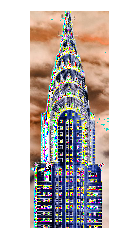

In [27]:
showme(img.astype(float))

max double image: [254 254 254]


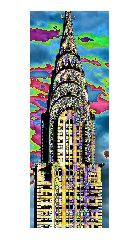

In [28]:
print ("max double image:", (img*2).max(0).max(0))
showme(img*2)

# Image analysis and manipulation

## gamma correction: changing contrast
you must make sure you change the data types appropriately while you manipulate image values

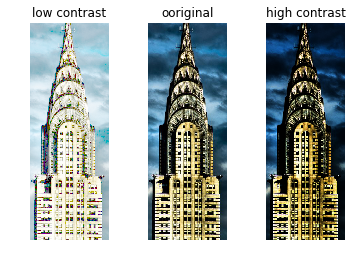

In [29]:
fig = pl.figure(131)
# gamma correction to change contrast
imgsq = img.astype(float)**0.2
#normalize
imgsq *= 255 / imgsq.max()
showme(imgsq.astype(np.uint8), ax=fig.add_subplot(131))
pl.title("low contrast")
showme(img, ax=fig.add_subplot(132))
pl.title("ooriginal")
imgsq = img.astype(float)**2
imgsq *= 255 / imgsq.max()
showme(imgsq.astype(np.uint8), ax=fig.add_subplot(133))
title = pl.title("high contrast")

matplotlib can also display correctly floating point arrays if they are in the range [0,1]

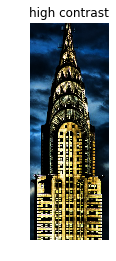

In [30]:
imgsq /= imgsq.max()
showme(imgsq)
title = pl.title("high contrast")

 sklearn provides a function which does rescaling and converting to uint8

[[[ 0.03397155  0.09118032  0.16315263]
  [ 0.03254133  0.08882737  0.16      ]
  [ 0.02977316  0.08421376  0.153787  ]
  ..., 
  [ 0.04        0.16633602  0.31889273]
  [ 0.04158401  0.16955017  0.32333718]
  [ 0.04319877  0.17279508  0.33685506]]

 [[ 0.0258516   0.07752403  0.14469819]
  [ 0.023391    0.07321799  0.13879277]
  [ 0.02105344  0.06903499  0.13301038]
  ..., 
  [ 0.02977316  0.14469819  0.28864283]
  [ 0.03114187  0.14769704  0.29287197]
  [ 0.03114187  0.14769704  0.29287197]]

 [[ 0.02460592  0.07535563  0.1417301 ]
  [ 0.02220684  0.07111111  0.1358862 ]
  [ 0.02105344  0.06903499  0.13301038]
  ..., 
  [ 0.02843522  0.1417301   0.28444444]
  [ 0.02977316  0.14469819  0.28864283]
  [ 0.02843522  0.1417301   0.28444444]]

 ..., 
 [[ 0.023391    0.09118032  0.11909266]
  [ 0.02460592  0.08882737  0.12456747]
  [ 0.0258516   0.08421376  0.12181469]
  ..., 
  [ 0.00961169  0.04319877  0.06497501]
  [ 0.00961169  0.04319877  0.06497501]
  [ 0.00961169  0.04319877  0.06497

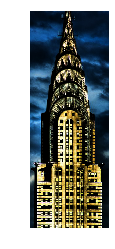

In [31]:
from skimage.exposure import rescale_intensity
imgsq = img.astype(float)**2
print (rescale_intensity(imgsq))
showme(rescale_intensity(imgsq))


## reading raw files. 
Image files formats like jpeg, png, etc contain both the data and some metadata (a "header") which allows readers to display correctly: relevant info is the size of the image (how many rows and columns), the data format (uint8 vs float), and also timestamp, info about the camera etc. 
The size info is **necessary** to correctly display a 2D array as an image, but often scientific images are saves as raw files, which contain **only the data** in order to save storage space and I/O time. Then there is no header, and no way for python to know how many rows, columns, channels, or even the data format, which is needed to know who to read numbers in! Set the data format to np.uint8, and then look for the image size. Find the size of the 2D array by trial and error.

In [32]:
otherim = imread("1-new-york-city-1270751697.jpg")
f = open("tmp.raw","w")
f.write(otherim.tostring())
f.close()


matplotlib can read a raw data file, but does not know how to display unless you tell it:
- the correct shape of the data array
- the data type format

In [33]:
np.fromfile("tmp.raw", np.uint8).size

754650

We can make a guess that this image will have 3 color channels, which is commonly true


In [34]:
np.fromfile("tmp.raw", np.uint8).size/3

251550

If our assumption is correct we have 251550 to be arranged in N rows and M columns, so we have one more constraint: NxM must equal 251550 exactly. 

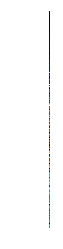

In [35]:
# try M=2
nm = 251550
showme(np.fromfile("tmp.raw", np.uint8).reshape(nm/2,2,3))

probably not right.... lets try all possible values for M between 3 and 251550/2, and enforce NxM = 251550 by asking that the remainder of 251550/M (1764000 % M) is exactly 0:
    if (nm % i) == 0:

//anaconda/lib/python2.7/site-packages/matplotlib-2.0.0+3158.g7b79174-py2.7-macosx-10.6-x86_64.egg/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


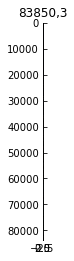

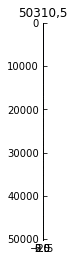

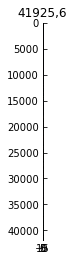

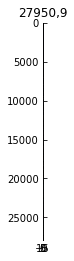

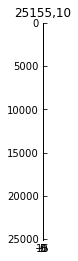

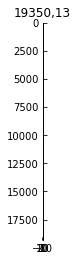

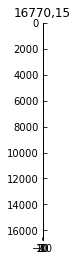

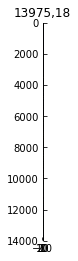

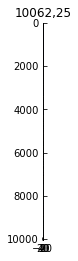

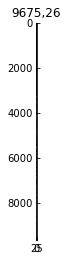

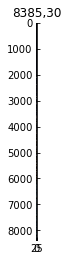

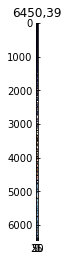

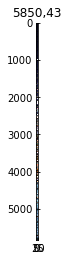

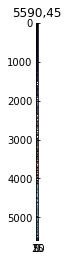

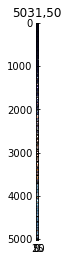

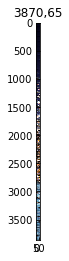

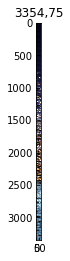

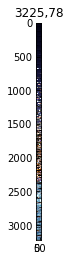

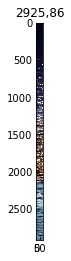

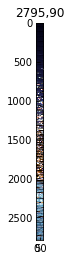

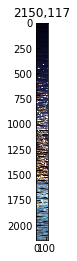

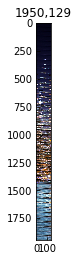

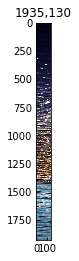

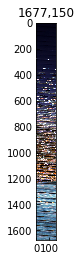

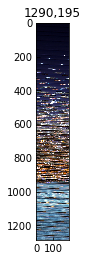

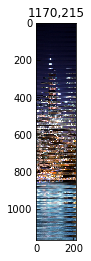

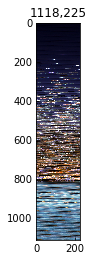

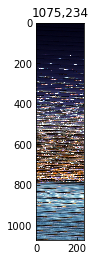

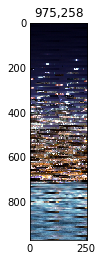

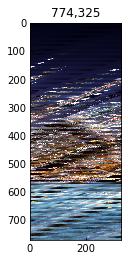

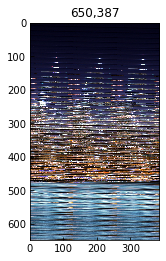

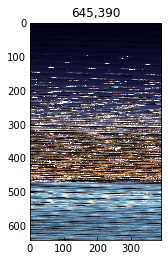

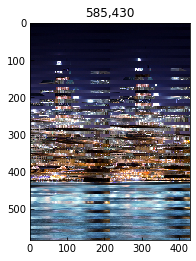

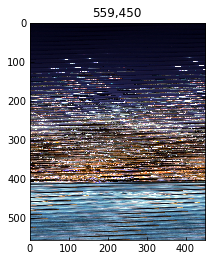

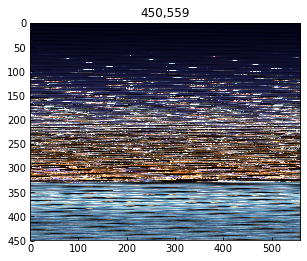

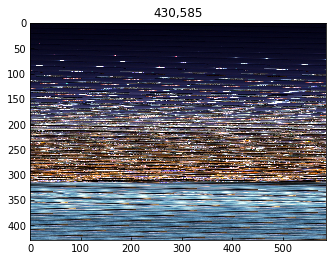

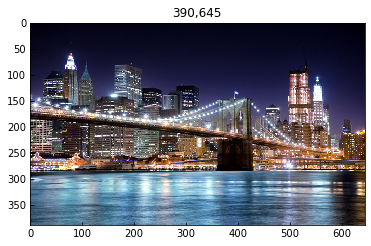

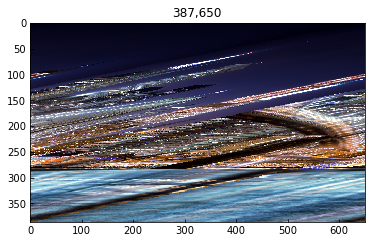

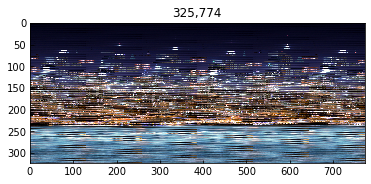

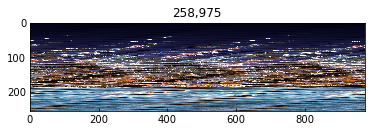

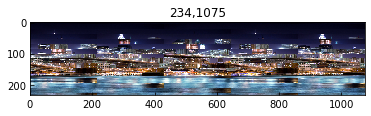

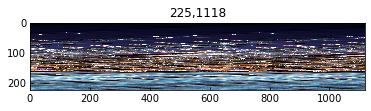

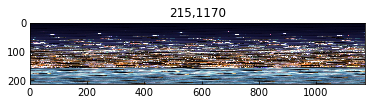

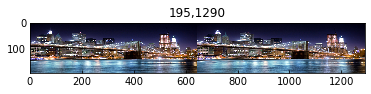

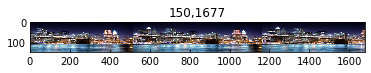

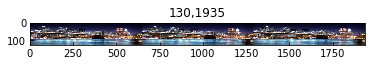

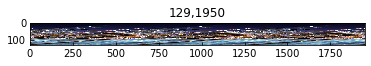

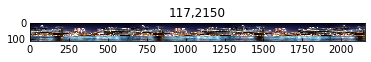

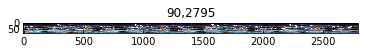

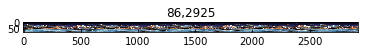

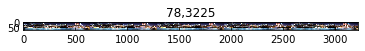

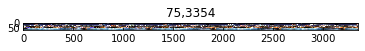

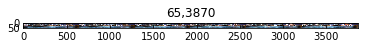

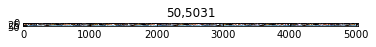

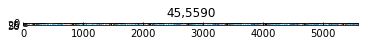

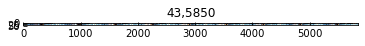

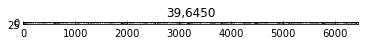

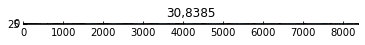

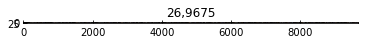

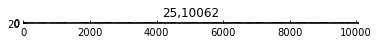

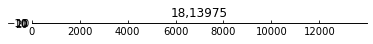

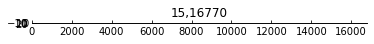

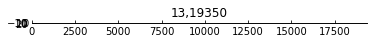

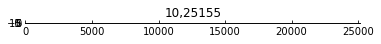

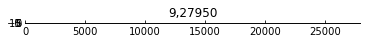

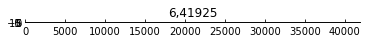

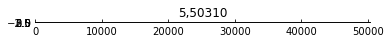

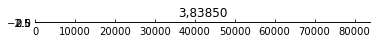

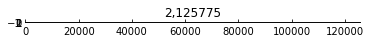

In [36]:
rawimg = np.fromfile("tmp.raw", np.uint8)
for i in range(3, nm / 2 + 1):
    if (nm % i) == 0:
        pl.figure()
        imshow(rawimg.reshape(nm/i,i,3))
        pl.title("%d,%d"%(251550/i, i))

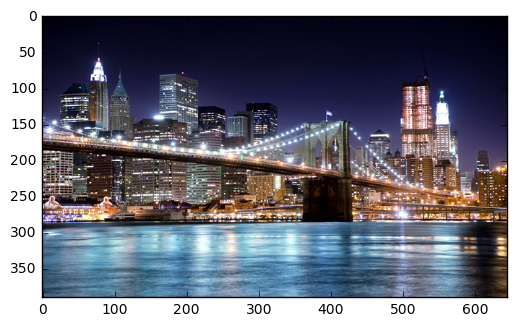

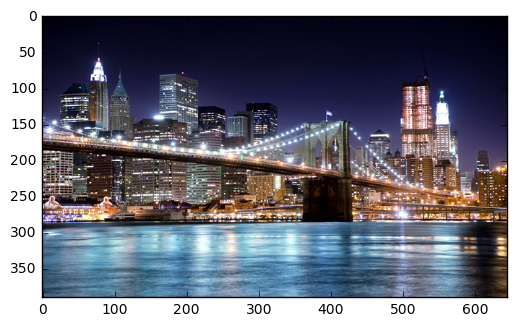

In [49]:
im = imshow(rawimg.reshape([390,645,3]))
fig = pl.figure()
im = imshow(rawimg.reshape(otherim.shape))

# Extracting areas from an image

## selecting based on flux 


From a black and white image, lets select the brightest lights

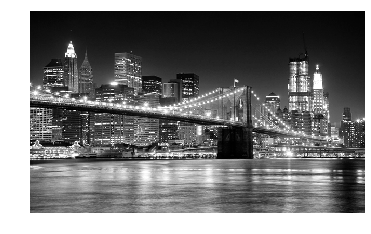

In [37]:
# turn  out last image B/W
bwrawimg = (rawimg.reshape([390,645,3]).sum(2) / 3.)
bwrawimg /= bwrawimg.max()
showme(bwrawimg, cmap="gray")

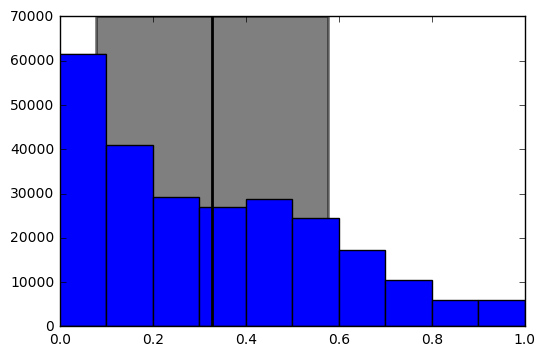

In [88]:
ax = pl.figure().add_subplot(111)
hist = ax.hist(bwrawimg.flatten())

ax.plot([bwrawimg.flatten().mean(), bwrawimg.flatten().mean()], ax.get_ylim(), lw=2, color='k')
fill = ax.fill_betweenx(ax.get_ylim(), bwrawimg.flatten().mean() - bwrawimg.flatten().std(), 
                 bwrawimg.flatten().mean() + bwrawimg.flatten().std(), lw=2, color='k', alpha=0.5)


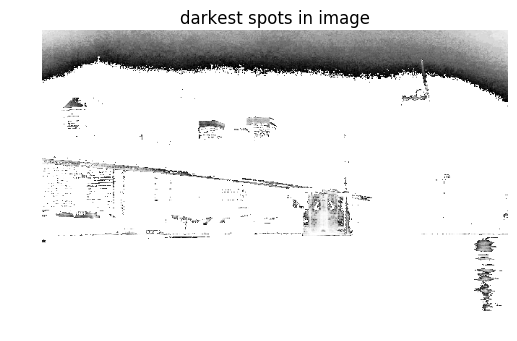

In [173]:
bwrawimg = (rawimg.reshape([390,645,3]).sum(2) / 3.)
bwrawimg /= bwrawimg.max()
bwrawimg[bwrawimg > bwrawimg.flatten().mean() - bwrawimg.flatten().std()] = 0
showme(bwrawimg, cmap="Greys")
title = pl.title('darkest spots in image')

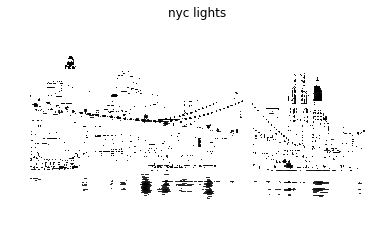

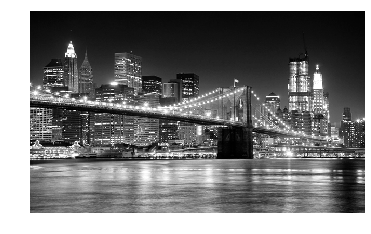

In [43]:
bwrawimg = (rawimg.reshape([390,645,3]).sum(2) / 3.)
bwrawimg /= bwrawimg.max()
bwrawimg[bwrawimg < bwrawimg.flatten().mean() + 2.0 * bwrawimg.flatten().std()] = 0
showme(bwrawimg, cmap="Greys")
title = pl.title('nyc lights')
showme((rawimg.reshape([390,645,3]).sum(2) / 3.), cmap="gray")

## extracting connnected regions

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  902,  902,  902,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         911,  911,    0,    0,  902,  902,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         911,    0,    0,    0,    0,  902,  902,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         911,    0,    0,    0,    0,  902,  902,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  937,    0,    0,    0,    0,    0,    0,    0,    0,
         911,    0,    0,    0,    0,  902,  902,    0,    0,    0,    0,
           0,    0,    0,    0, 

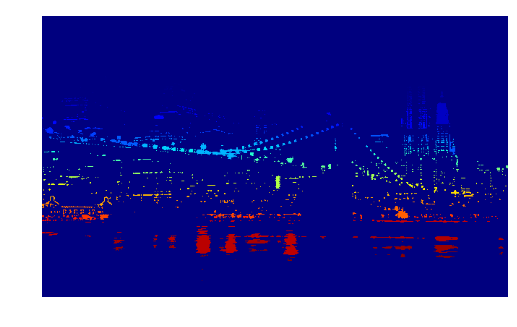

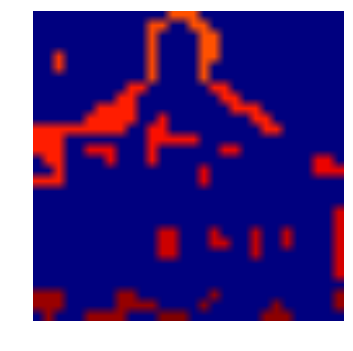

In [175]:
bwrawimg = (rawimg.reshape([390,645,3]).sum(2) / 3.)
bwrawimg /= bwrawimg.max()
mask = bwrawimg > bwrawimg.mean() + 2.0 * bwrawimg.flatten().std()
label_im, nb_labels = nd.label(mask)
nb_labels # how many regions?
showme(label_im)        
showme(label_im[250:280,0:30])
label_im[250:280,0:30]

## selecting by color

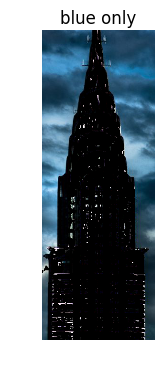

In [176]:
skyfiImg = img.copy()
skyfiImg[(img[:,:,2] < img[:,:,1]) * (img[:,:,2] < img[:,:,0])] = 0
showme(skyfiImg)
title = pl.title('blue only')

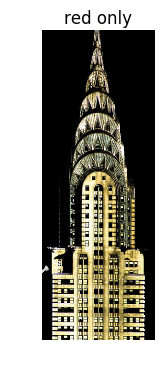

In [177]:
redImg = img.copy()
redImg[(img[:,:,0] < img[:,:,1]) * (img[:,:,0] < img[:,:,2])] = 0
showme(redImg)
title = pl.title('red only')

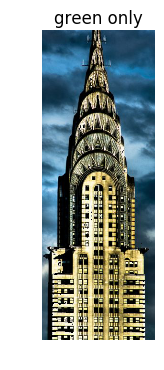

In [178]:
greenImg = img.copy()
greenImg[(img[:,:,1] < img[:,:,0]) * (img[:,:,1] < img[:,:,2])] = 0
showme(greenImg)
title = pl.title('green only')

## Finding edges

### Sobel filter

In [44]:
def sobelall(img, smooth=True):
    fig = pl.figure()
    showme(img, cmap="viridis")
    title = pl.title("original")
    ax = 1
    if len(img.shape) == 3:
        ax = 2
    if smooth:
        fig = pl.figure()
        if ax == 2:
            img = nd.filters.gaussian_filter(img, [5,5,0])
        else:
            img = nd.filters.gaussian_filter(img, [5,0])
        showme(img, cmap="viridis")
        title = pl.title("smoothed")
    sx = nd.filters.sobel(img, 0)
    fig = pl.figure()
    if ax == 2:
        showme(sx.mean(ax), cmap="Greys")
        pl.title("x-axis sobel")
        sy = nd.filters.sobel(img, 1)
        fig = pl.figure()
        showme(sy.mean(ax), cmap="Greys")
    else: 
        showme(sx, cmap="Greys")
        pl.title("x-axis sobel")
        sy = nd.filters.sobel(img, 1)
        fig = pl.figure()
        showme(sy, cmap="Greys")
        
    title = pl.title("y-axis sobel")
    
    mag = np.sqrt(sx**2 + sy**2).astype(float)
    mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
    fig = pl.figure()
    if ax == 2:
        showme(mag.astype(np.uint8).mean(2), cmap="Greys")
        tmp = mag.astype(np.uint8).mean(2)
    else:
        showme(mag.astype(np.uint8), cmap="Greys")
        tmp = mag.astype(np.uint8)
    title = pl.title("combined x-y axis filters")
    tmp[tmp < 1] = 0
    tmp[tmp > 100] = 255
    fig = pl.figure()
    showme(tmp, cmap="Greys")

In [45]:
nd.filters.sobel(imread("esb.jpg").sum(2), 1)

array([[ 0,  0,  0, ..., 36, 27, 15],
       [ 0,  0,  0, ..., 36, 14,  0],
       [ 0,  0,  0, ..., 37,  6,  0],
       ..., 
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint64)

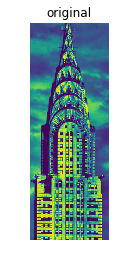

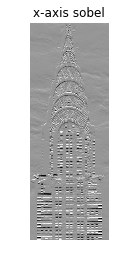

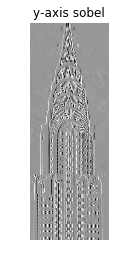

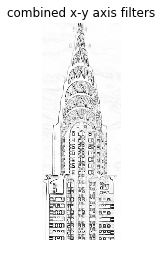

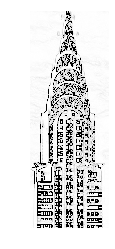

In [46]:
imfile = "esb.jpg"
sobelall(imread(imfile).mean(2), smooth=False)

(200, 100)


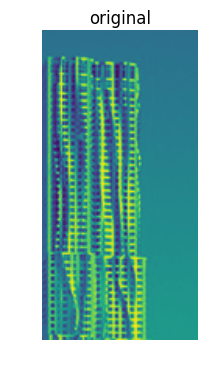

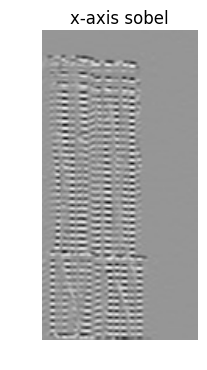

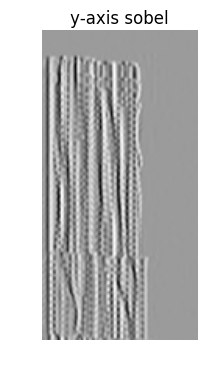

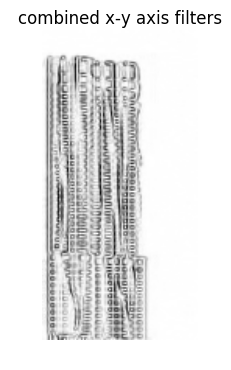

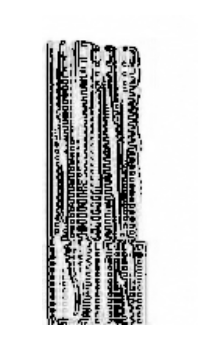

In [134]:
imfile = "New-York-by-Gehry-1-537x368.jpg"
sobelall(imread(imfile)[0:200,150:250].mean(2), smooth=False)


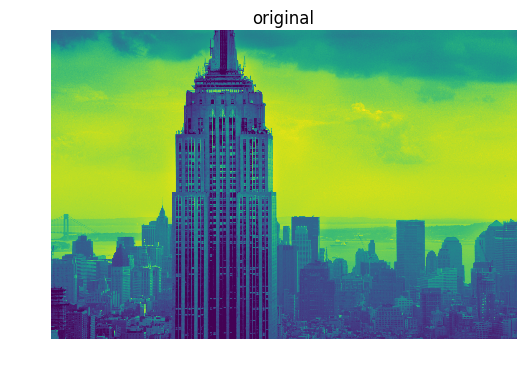

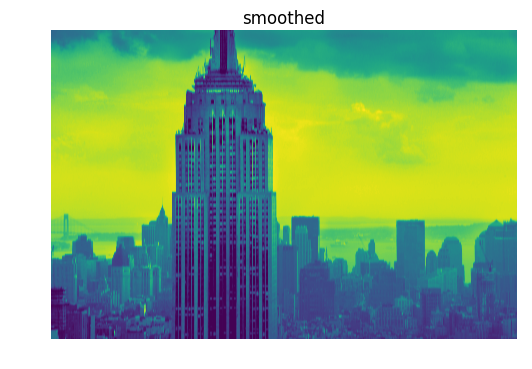

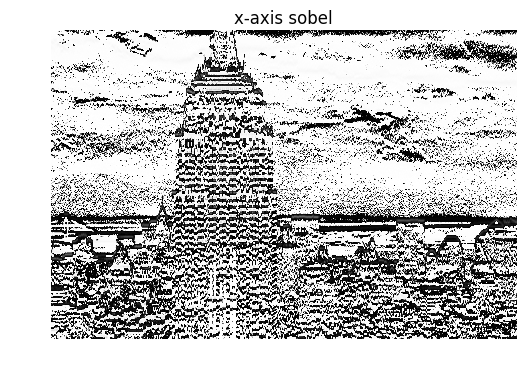

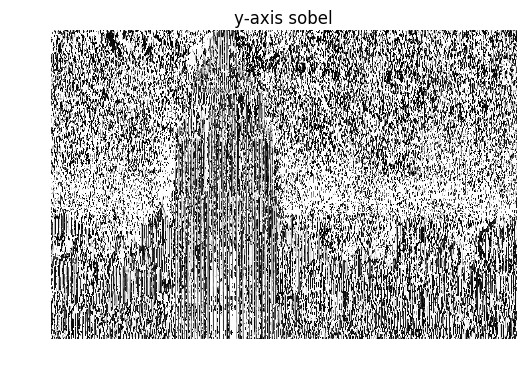

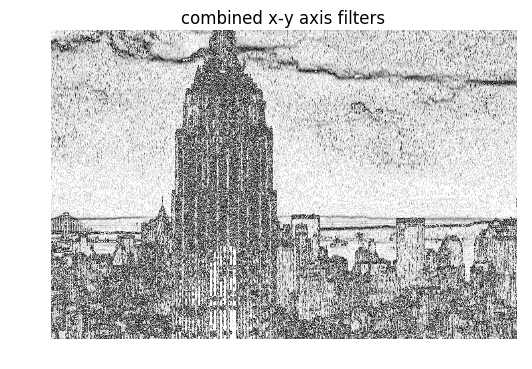

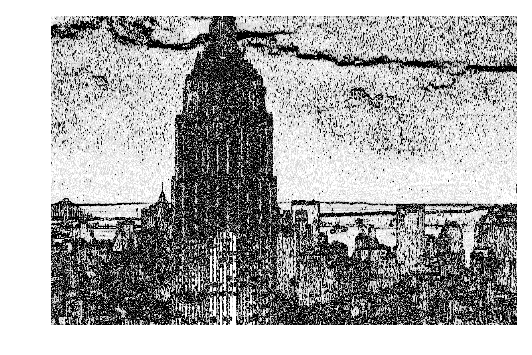

In [43]:
imfile = "NYCskyline.jpg"#'Pict0296.jpg'
sobelall(imread(imfile))

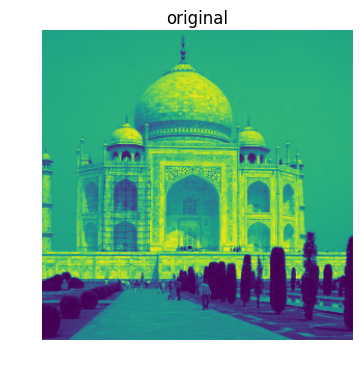

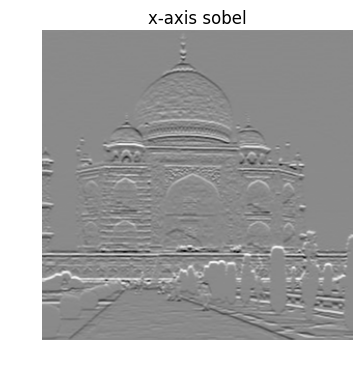

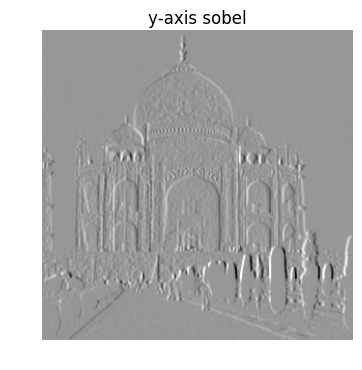

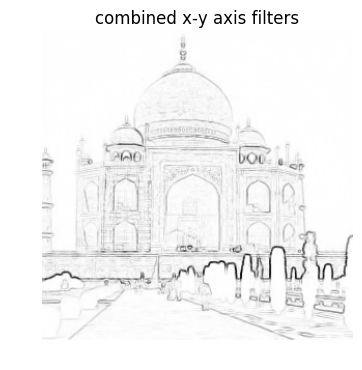

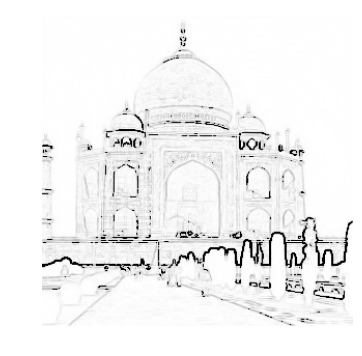

In [135]:
imfile = 'taj_orig.jpg'
sobelall(imread(imfile).mean(2), smooth=False)

### Canny filter

In [158]:
from skimage import feature

def cannyall(im, sig=5):
    edges1 = feature.canny(im)
    edges2 = feature.canny(im, sigma=sig)

    # display results
    fig, (ax1, ax2, ax3) = pl.subplots(nrows=1, ncols=3, figsize=(8, 3), 
                                    sharex=True, sharey=True)
    ax1.imshow(im, cmap="viridis")
    ax1.axis('off')
    ax1.set_title('noisy image', fontsize=20)

    ax2.imshow(edges1, cmap="Greys")
    ax2.axis('off')
    ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

    ax3.imshow(edges2, cmap="Greys")
    ax3.axis('off')
    ax3.set_title('Canny filter, $\sigma=%d$'%sig, fontsize=20)

    fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                        bottom=0.02, left=0.02, right=0.98)




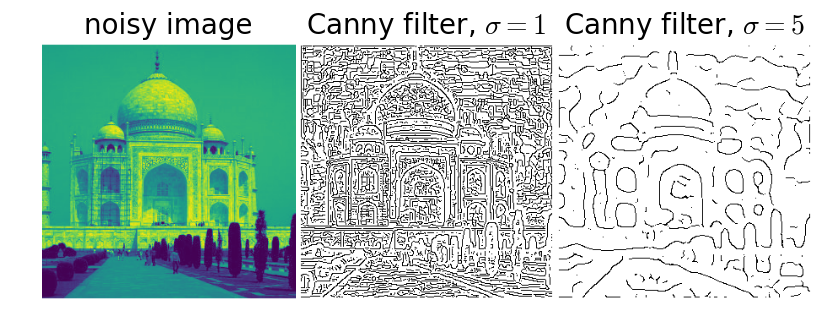

In [159]:
imfile = 'taj_orig.jpg'
im = imread(imfile).mean(2)
cannyall(im)


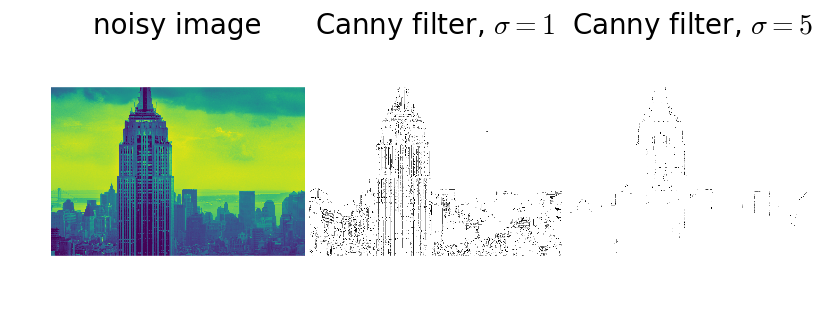

In [172]:
imfile = "NYCskyline.jpg"#'Pict0296.jpg'
im = imread(imfile)
cannyall(im, sig=5)


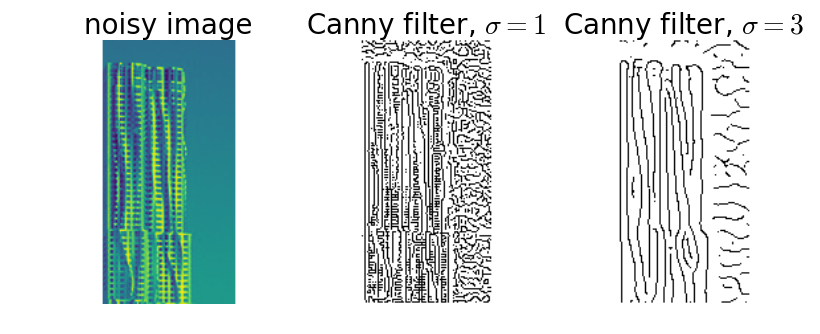

In [167]:
imfile = "New-York-by-Gehry-1-537x368.jpg"
im = imread(imfile)[0:200,150:250].mean(2)
cannyall(im, sig=3)


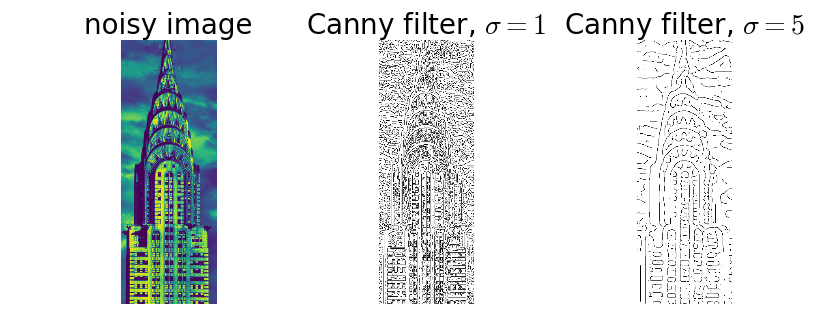

In [170]:
imfile = "esb.jpg"
im = imread(imfile).mean(2)
cannyall(im, sig=5)
